In [ ]:
#!pip install scikit-image

In [ ]:
from skimage import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
def plot_image(images,caption = None,cmap=None):
  f,axes = plt.subplots(1,len(images),sharey=True)
  f.set_figwidth(15)
  for ax,image in zip(axes,images):
    ax.imshow(image,cmap=cmap)


In [ ]:
DATASET_PATH='/content/drive/MyDrive/flowers'
flower_cls=['daisy','rose']

In [ ]:
# glob example for path
flower_path = os.path.join(DATASET_PATH,flower_cls[1],'*')
print(flower_path)

/content/drive/MyDrive/flowers/rose/*


In [ ]:
flower_path = glob.glob(flower_path)
print(flower_path[3])


/content/drive/MyDrive/flowers/rose/2258973326_03c0145f15_n.jpg


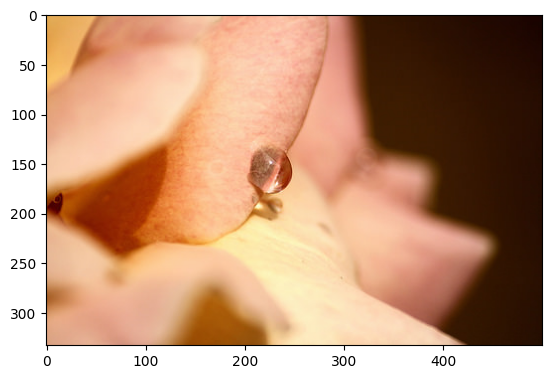

In [ ]:
rand_index = random.randint(0,len(flower_path))
image = io.imread(flower_path[rand_index])
plt.imshow(image)

In [ ]:
image.shape

(333, 500, 3)

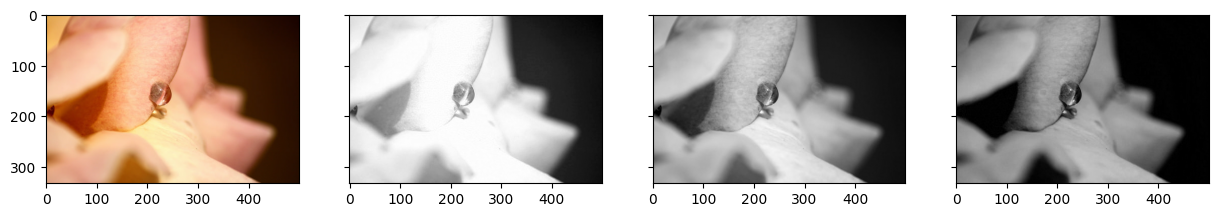

In [ ]:
# plot the orignal and RGB channel
f,(ax1,ax2,ax3,ax4)= plt.subplots(1,4,sharey=True)
f.set_figwidth(15)
ax1.imshow(image)
ax2.imshow(image[:,:,0],cmap='gray')
ax3.imshow(image[:,:,1],cmap='gray')
ax4.imshow(image[:,:,2],cmap='gray')

In [ ]:
# morphological transformations

# skimage use to get best threshold value

In [ ]:
from skimage import filters

In [ ]:
threshold = filters.threshold_otsu(image[:,:,0])
print(threshold)

143


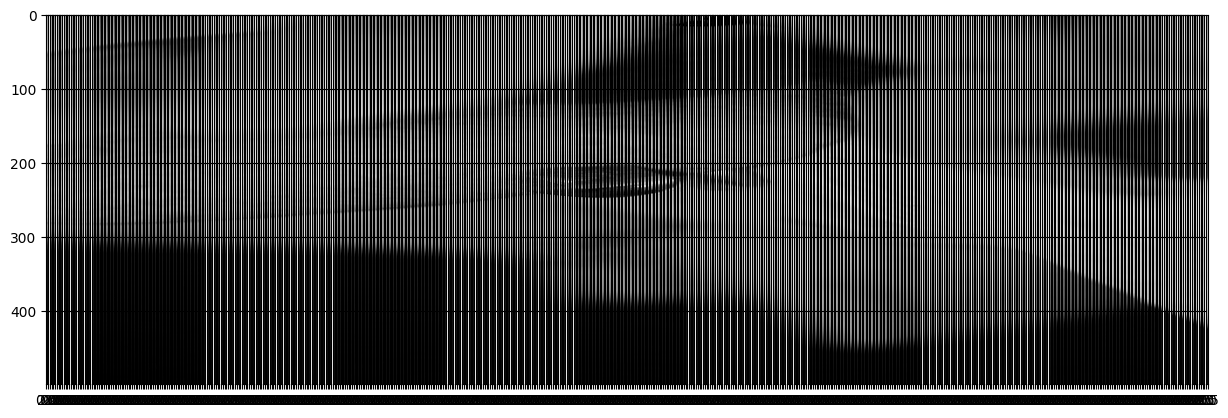

In [ ]:
bin_image=image[:,:,0]>128
plot_image(image,bin_image,cmap='gray')

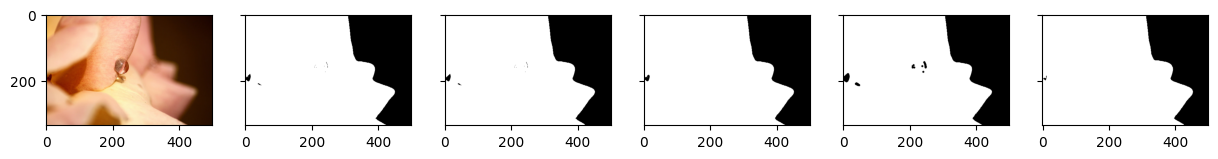

In [ ]:
# erosion dilution , opening and closing
# erosion is enhance dark
# dilation is enhance light color

from skimage.morphology import binary_closing,binary_dilation,binary_erosion,binary_opening
from skimage.morphology import disk

selem = disk(3)

# opening and closing
open_image = binary_opening(bin_image,selem)
close_image = binary_closing(bin_image,selem)

# erosion and dilation
eroded_image = binary_erosion(bin_image,selem)
dilated_image = binary_dilation(bin_image,selem)

plot_image([image,bin_image,open_image,close_image,eroded_image,dilated_image],['original','open','close','eroded','dilated'],cmap='gray')

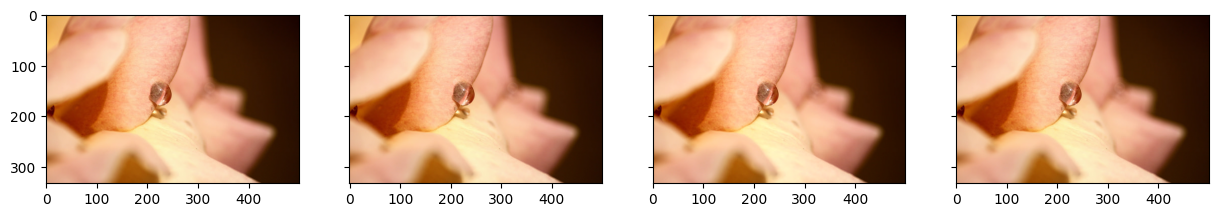

In [ ]:
# to NORMALIZE THE IMAGE use min-max and percentile

norm1_image = image/255.0
norm2_image = (image-np.min(image))/(np.max(image)-np.min(image))
norm3_image = (image-np.percentile(image,5))/(np.percentile(image,95)-np.percentile(image,5))
plot_image([norm1_image,norm2_image,norm3_image,image],cmap='gray')

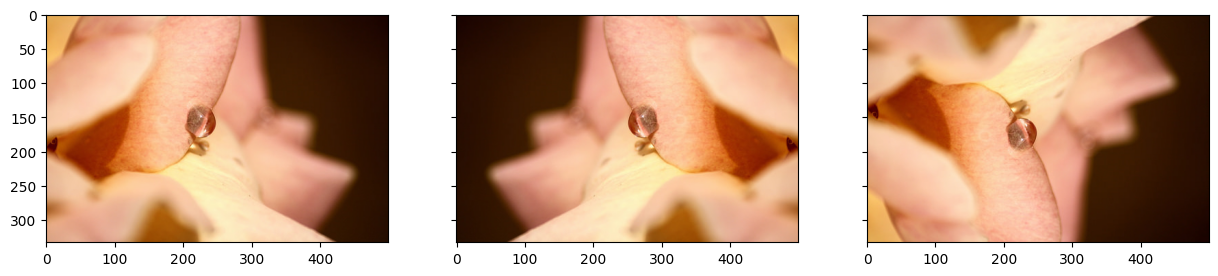

In [ ]:
from skimage import transform

# flip lesft-right ,up-down
image_flipr= np.fliplr(image)
image_flipud= np.flipud(image)
plot_image([image,image_flipr,image_flipud])

In [ ]:
image.shape

(333, 500, 3)

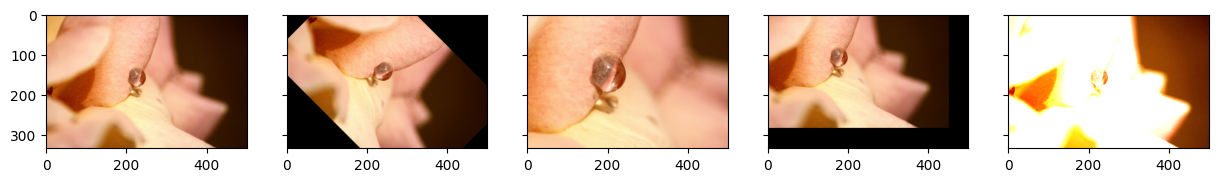

In [ ]:
# define the center image

shift_x,shift_y = image.shape[1]/2,image.shape[0]/2

# create the transformation image

matrix_to_topleft = transform.SimilarityTransform(translation=(-shift_x,-shift_y))
matrix_to_center = transform.SimilarityTransform(translation=(shift_x,shift_y))

# rotation transform
rot_transform = transform.AffineTransform(rotation=np.deg2rad(45))
rot_matrix = matrix_to_topleft + rot_transform + matrix_to_center
rot_image = transform.warp(image,rot_matrix.inverse)

# scaling
scale_transform = transform.AffineTransform(scale=(0.5,0.5))
scale_matrix = matrix_to_topleft + scale_transform + matrix_to_center
scale_image = transform.warp(image,scale_matrix)

# translation
translation_transform = transform.AffineTransform(translation=(50,50))
translation_matrix = matrix_to_topleft + translation_transform + matrix_to_center
translation_image = transform.warp(image,translation_matrix)

# shear

shear_transform = transform.AffineTransform(shear=np.deg2rad(0.5))
shear_matrix = matrix_to_topleft + shear_transform + matrix_to_center
shear_image = transform.warp(image,shear_matrix)

# jitter
bright_jitter = image*0.00999 + np.zeros_like(image)*0.00001

# plot images
plot_image([image,rot_image,scale_image,translation_image,bright_jitter])
